In [1]:
# 영화 리뷰 분류 (이진분류)
# 영화 리뷰를 긍정, 부정으로 분류
import keras
keras.__version__

'2.9.0'

In [2]:
# num_words=10000 가장 자주 나타나는 단어 10,000개만 사용, 드물게 나타나는 단어는 무시
# train_data, test_data : 리뷰의 목록
# 각 리뷰는 단어 인덱스의 리스트 (단어 시퀀스가 인코딩된 것)
# train_labels, test_labels 부정 0, 긍정 1
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels)=imdb.load_data(num_words=10000)

In [3]:
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
# 리뷰 데이터 하나를 원래 영어 단어로 어떻게 바꾸는지 확인
# word_index : 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()
print(list(word_index.items())[:10])
# 정수 인덱스와 단어의 순서를 바꾼 리스트
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print(list(reverse_word_index.items())[:10])

[('fawn', 34701), ('tsukino', 52006), ('nunnery', 52007), ('sonja', 16816), ('vani', 63951), ('woods', 1408), ('spiders', 16115), ('hanging', 2345), ('woody', 2289), ('trawling', 52008)]
[(34701, 'fawn'), (52006, 'tsukino'), (52007, 'nunnery'), (16816, 'sonja'), (63951, 'vani'), (1408, 'woods'), (16115, 'spiders'), (2345, 'hanging'), (2289, 'woody'), (52008, 'trawling')]


In [7]:
# 데이터 준비
# 신경망에 숫자 리스트를 입력할 수는 없음
# 리스트를 one hot 인코딩 : 0과 1의 벡터로 변환
# 예를 들면 [3, 5]의 경우 인덱스 3과 5의 위치를 1로 나머지는 모두 0으로 변환
# x축 문장 (25000개), y축 전체 단어 (10000개) 
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 생성, 제로패딩
    results = np.zeros((len(sequences), dimension))
    # enumerate : 인덱스와 데이터 리턴
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # results[i]에서 특정 인덱스의 위치를 1로 나머지는 0으로 채움(원핫인코딩)
    return results
# 학습용 데이터를 2차원 벡터(행렬)로 변환
x_train = vectorize_sequences(train_data)
# 검증용 데이터를 2차원 벡터(행렬)로 변환
x_test = vectorize_sequences(test_data)


In [8]:
# 변환된 샘플의 형태
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# 레이블을 1차원 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
# 신경망 모델 만들기
from keras import models
from keras import layers
model = models.Sequential()
# 은닉층1(16개의 노드)
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# 은닉층2(16개의 노드)
model.add(layers.Dense(16, activation='relu'))
# 출력층
model.add(layers.Dense(1, activation='sigmoid'))
# model.add(layers.Dense(2, activation='sigmoid'))[x], 2, activation='softmax'

In [11]:
# 이진 분류 문제이고 신경망의 출력이 확률일 경우 binary_crossentropy 손실함수가 적합
# rmsprop 옵티마이저와 binary_crossentropy 손실 함수 사용
# 학습하는 동안 정확도를 사용해 모니터링
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Train, Validation 구분
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
# 512개 샘플씩 5회 학습
# 검증용 데이터셋으로 손실과 정확도 측정
history = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test[:1000], y_test[:1000], verbose=0)


Epoch 1/10
30/30 [==============================] - 2s 42ms/step - loss: 0.5192 - accuracy: 0.7753 - val_loss: 0.3789 - val_accuracy: 0.8730
Epoch 2/10
30/30 [==============================] - 1s 20ms/step - loss: 0.2985 - accuracy: 0.9049 - val_loss: 0.3579 - val_accuracy: 0.8477
Epoch 3/10
30/30 [==============================] - 1s 21ms/step - loss: 0.2191 - accuracy: 0.9295 - val_loss: 0.2777 - val_accuracy: 0.8891
Epoch 4/10
30/30 [==============================] - 1s 19ms/step - loss: 0.1740 - accuracy: 0.9426 - val_loss: 0.2754 - val_accuracy: 0.8893
Epoch 5/10
30/30 [==============================] - 1s 19ms/step - loss: 0.1388 - accuracy: 0.9561 - val_loss: 0.2812 - val_accuracy: 0.8880
Epoch 6/10
30/30 [==============================] - 1s 19ms/step - loss: 0.1137 - accuracy: 0.9663 - val_loss: 0.3000 - val_accuracy: 0.8844
Epoch 7/10
30/30 [==============================] - 1s 19ms/step - loss: 0.0914 - accuracy: 0.9759 - val_loss: 0.3263 - val_accuracy: 0.8815
Epoch 8/10
30

In [15]:
# model.fit() 함수는 History 객체 리턴
# 학습하는 동안 발생한 모든 정보를 저장
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

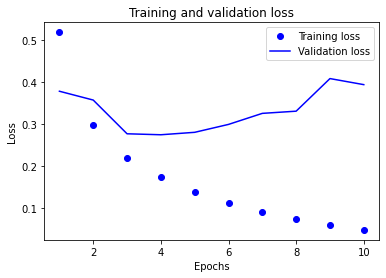

In [16]:
# 학습용과 검증용 데이터에 대한 손실과 정확도 출력
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 11)
# bo 파란색 점선
plt.plot(epochs, loss, 'bo', label='Training loss')
# b 파란색 실선
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

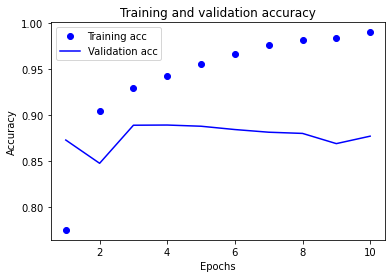

In [17]:
plt.clf() # 그래프 초기화
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# 새로운 데이터에 대해 예측
# 어떤 리뷰에 대한 긍정 확률 예측
model.predict(x_test[:1000])

32/32 [==============================] - 0s 3ms/step


array([[1.20013632e-01],
       [9.99982715e-01],
       [9.74693060e-01],
       [9.51809347e-01],
       [9.87212121e-01],
       [9.89425778e-01],
       [9.95574117e-01],
       [5.24557289e-03],
       [9.70344424e-01],
       [9.99990582e-01],
       [9.84739184e-01],
       [4.13766224e-03],
       [3.09650713e-05],
       [3.05832550e-03],
       [9.99912858e-01],
       [5.02229204e-06],
       [8.97873223e-01],
       [8.33954811e-01],
       [2.39070039e-03],
       [1.32912360e-02],
       [9.99953389e-01],
       [9.99436557e-01],
       [8.62400532e-02],
       [9.93250012e-01],
       [8.74494553e-01],
       [9.99170184e-01],
       [9.72736925e-02],
       [9.78646100e-01],
       [9.98290956e-01],
       [4.34009526e-05],
       [9.99731600e-01],
       [2.69071579e-01],
       [9.62606788e-01],
       [2.74052638e-07],
       [7.20285904e-03],
       [1.60393654e-03],
       [9.99980092e-01],
       [9.98877227e-01],
       [9.79020670e-02],
       [5.67483762e-03],
